## Inference into the data

**Diamond pricing is a complicated process that is impacted by a number of elements including carat, cut, color, and price. Here I examine the relationship between these variables and illustrates it with graphics and also build a regression model to predict the price of a diamond based on certain features.**


 
### Feature Explanation from the dataset:

1.price:          price in US dollars ($326–$18,823)

2.carat:          weight of the diamond (0.2–5.01)

3.cut:            quality of the cut (Fair, Good, Very Good, Premium, Ideal)

4.color:          diamond colour, from J (worst) to D (best)

5.clarity:        a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

6.x:              length in mm (0–10.74)

7.y:              width in mm (0–58.9)

8.z:              depth in mm (0–31.8)

9.depth:          total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43–79)

10.table:          width of top of diamond relative to widest point (43–95)


## Importing libraries

In [458]:
#importing libraries for data wrangling and data visualization

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# importing libraries for building machine Learning model

from sklearn.model_selection import train_test_split                  
from sklearn.preprocessing import MinMaxScaler                        
from sklearn.compose import ColumnTransformer                          
from sklearn.ensemble import RandomForestRegressor                    
from sklearn.model_selection import cross_val_score                  
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV


## Loading the dataset

In [743]:
data = pd.read_csv('./data/diamonds.csv', sep=',') # to  read .csv file 
data.head()                                            # to check the top 5 rows of the dataframe

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Basic EDA

### Checking NaN's 

In [744]:
# to extrac null values in terms of percentage
def null_percentage(dataframe):
    """ This function outputs total null values in percentage"""
    null_percentage = (dataframe.isna().sum()/dataframe.shape[0]*100)
    return null_percentage

null_percentage(data)

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64

**Awesome no NaN's found**

### Checking the shape of the data

In [745]:
# shape of the dataframe
def shape_df(dataframe):
    """ This function outputs the length and shape of a dataframe"""
    return f'shape :{dataframe.shape}'

shape_df(data)

'shape :(53940, 10)'

**got 53940 diamonda and 10 properties associated to each diamond**

### basic summar statistics of dataset 

In [746]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


**datatype info about the dataset** 

**3 features are with catogorial datatype and the rest is float and integer**

### Plots of some features

In [747]:
# calling the data.head again
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### plot of 'carat' to check its distribution in the dataset

<AxesSubplot:xlabel='carat', ylabel='Count'>

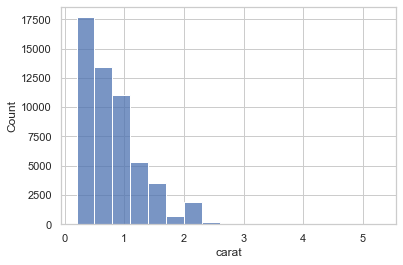

In [748]:
sns.histplot(data = data, x = 'carat', binwidth= 0.3)

**The dataset comprises diamonds with a majority of them weighing less than 1 carat in weight, and the distribution appears to be right skewed.**

#### count plot of different 'cut' in the diamond

<AxesSubplot:xlabel='cut', ylabel='count'>

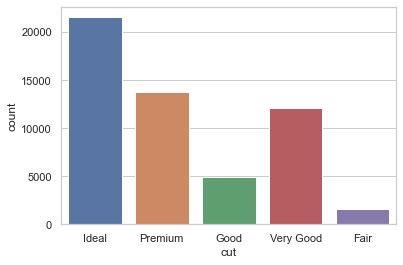

In [749]:
sns.countplot(data = data , x = 'cut')

**found 5 types of cut in the diamond dataset (infomation will be used in the analysis)**

#### count plot of diamond color

<AxesSubplot:xlabel='color', ylabel='count'>

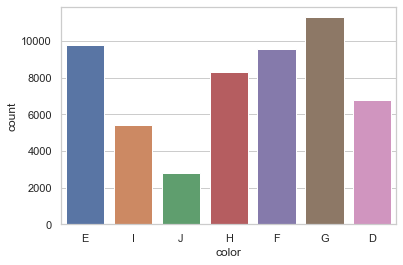

In [750]:
sns.countplot(data = data , x = 'color')

**found 7 different colors of diamond in the dataset**

#### histogrma of depth of a diamond

<AxesSubplot:xlabel='depth', ylabel='Count'>

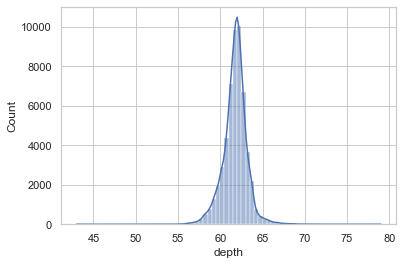

In [751]:
sns.histplot(data = data, x = 'depth', binwidth= 0.5, kde=True)

**diamond depth distribution: Seems like all the diamond in the dataset have a depth with mean = 62% approx, it seems 
59.5 to 62.9 % to be a good depth for a diamond, When it comes to getting the large size of a diamond, depth value is important as the weigth of the diamond is largely located at that point.**

#### histogram of table (top face) of a diamond

<AxesSubplot:xlabel='table', ylabel='Count'>

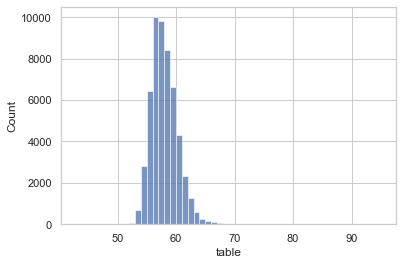

In [752]:
sns.histplot(data = data, x = 'table', binwidth= 1)

**Table is a diamond's biggest facet, and it is responsible for the diamond's brightness and light performance. The table facet's primary function is to deflect rays entering the diamond and reflect them back from the pavilion. So technically table might play an importatn parameters in decidng the price and quality**

#### price distribution of diamond in the dataset

<AxesSubplot:xlabel='price', ylabel='Count'>

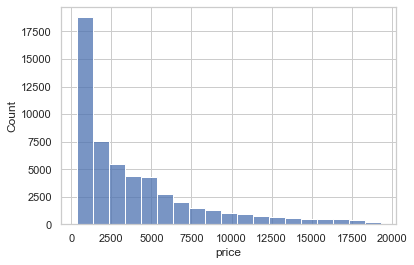

In [753]:
sns.histplot(data = data, x = 'price', binwidth= 1000)

**price distribution of all the diamonds in the dataset, nearly 30% of all the diamond are in the range of 1000 dollars**

#### plot of carat vs price with color distribution

color
D     6775
E     9797
F     9542
G    11292
H     8304
I     5422
J     2808
Name: color, dtype: int64

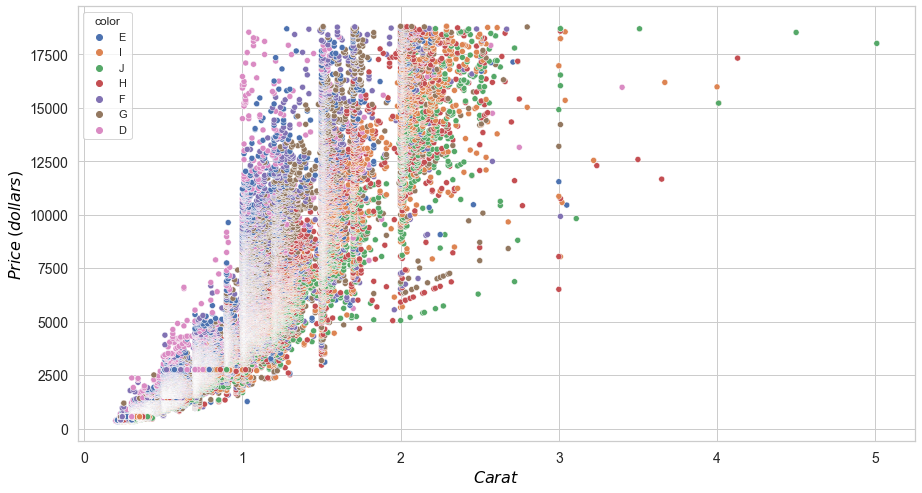

In [769]:
# setting the theme for seaborn plot
sns.set_theme(context='notebook',
    style="whitegrid",
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None)
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
#setting the figure size for the plot
fig_dims = (15,8 )
fig, ax = plt.subplots(figsize=fig_dims)
# scatter plot with hue as color column
sns.scatterplot(x  = data.carat, y = data.price, ax = ax, hue= data.color) 
plt.ylabel('Price')
plt.xlabel('Carat')
plt.xlabel(r'$Carat$ ', fontdict = font)
plt.ylabel(r'$Price_ (dollars)$ ', fontdict = font)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

#Since the plot is very dence and its diffiult to visualize which color diamond is most in the dataset, a group by is performed
# on color columns to get the counts on it
data_color = data.groupby(by=['color'])['color'].count()
data_color

**The price of diamonds rises as the carat size increases, which clearly indicates a strong positve coorelation between them.**

**By looking at the groupby table above the color G is the most popular in the dataset and it fall in the 
range of near colorless category of diamonds and followed by other color as E, F, H, D, I and J.**

## Feature scaling and Engineering

**Feature scaling is a technique for normalizing a set of independent variables or data components. It's also referred to as data normalization in data processing, and it's usually done during the data preparation stage.**

**Machine learning algorithms just look at numbers, and if there is a significant difference in range, such as a few ranging in the thousands against a few ranging in the tens, it assumes that greater ranging numbers have some form of superiority. As a result, these larger numbers begin to play a larger part in the model's training.**

### Encoding all the categorical columns

**Many machine learning algorithms are unable to work directly on label data. They demand that all input and output variables be numeric.**

#### encoding  column 'cut' 

In [294]:
# extracting all the unique values from the column 'cut'
cuts = pd.unique(data['cut']).tolist()
cuts

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']

In [295]:
# assigning dummmy using get_dummies
data[['Premium', 'Good', 'Very Good', 'Fair']] = pd.get_dummies(data['cut'], drop_first= True)

In [296]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,Premium,Good,Very Good,Fair
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,1,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0,0,0


#### encoding  column 'color' 

In [297]:
colors = pd.unique(data['color']).tolist()
colors

['E', 'I', 'J', 'H', 'F', 'G', 'D']

In [298]:
# assigning dummmy using get_dummies
data[['I', 'J', 'H', 'F', 'G', 'D']] = pd.get_dummies(data['color'], drop_first= True)

In [299]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,Premium,Good,Very Good,Fair,I,J,H,F,G,D
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,1,0,0,0,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0,1,0,0,0,0,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,0,0,0,1,0,0,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,1,0,0,0,0,0,1,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0,0,0,0,0,0,0,0,1


#### encoding  column 'clarity 

In [300]:
clarity = pd.unique(data['clarity']).tolist()
clarity

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']

In [301]:
# assigning dummmy using get_dummies
data[['SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']] = pd.get_dummies(data['clarity'], drop_first= True)

In [302]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,...,F,G,D,SI1,VS1,VS2,VVS2,VVS1,I1,IF
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,...,0,0,0,0,0,1,0,0,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,...,0,0,0,0,1,0,0,0,0,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,...,0,0,0,0,0,0,1,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,...,0,1,0,0,0,0,0,1,0,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,...,0,0,1,0,0,1,0,0,0,0


### Splitting the dataframe into X and y and also dropping categorial features as the have been encoded into numeric feature (cut, color, clarity)

In [595]:
#droping the feature column from the dataframe data and assigning it to an new dataframe X
X  = data.drop(['cut','color','clarity','price'], axis=1) 
y = data['price'] # assigning column 'price' to dataframe y

In [596]:
X.head()

,carat,depth,table,x,y,z,Premium,Good,Very Good,Fair,...,F,G,D,SI1,VS1,VS2,VVS2,VVS1,I1,IF
0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


### Splitting the dataframe X into Xtrain and Xtest

In [703]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=.25,random_state= 42)

In [704]:
Xtrain.shape, Xtest.shape

((40455, 23), (13485, 23))

### Scaling the numeric feature (depth, table, x,y,z, carat)

In [705]:
# Defining transformer and scaling the feature

numeric_col =Xtrain.select_dtypes(include='number').columns # extracting numeric columns
scaler = MinMaxScaler()                                     # initializing the MinMaxScaler
transformers = [('scaler', MinMaxScaler(), numeric_col)]    # defining a transformer

In [706]:
# Define column transformer
column_transformer = ColumnTransformer(
    transformers=transformers, remainder='drop')

In [707]:
xtrain_scaled = column_transformer.fit_transform(Xtrain) #fit_transform the training data   
xtest_scaled = column_transformer.transform(Xtest)       # transfomr the test data

In [708]:
# building the xtrain_scaled dataframe from the transformed data which is a numpy array
xtrain_scaled  = pd.DataFrame(xtrain_scaled, columns=Xtrain.columns) 
#xtrain_scaled.head() 

In [709]:
# building the xtest_scaled dataframe from the transformed data which is a numpy array

xtest_scaled  = pd.DataFrame(xtest_scaled,columns=Xtest.columns)
#xtest_scaled.head()

,carat,depth,table,x,y,z,Premium,Good,Very Good,Fair,...,F,G,D,SI1,VS1,VS2,VVS2,VVS1,I1,IF
0,0.008316,0.530556,0.250000,0.369646,0.067912,0.077673,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.079002,0.472222,0.269231,0.506518,0.092020,0.102516,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.041580,0.530556,0.230769,0.443203,0.080475,0.092767,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.047817,0.494444,0.269231,0.458101,0.083022,0.093711,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.280665,0.536111,0.230769,0.692737,0.125127,0.144969,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Building Machine Learning Model to predict price of diamonds

### RandomForestRegressor
#### Baseline model with default hyperparameters**

In [710]:
# calling the model and fittig it with training data
%%time
RFC = RandomForestRegressor(n_jobs= -1, random_state=42).fit(xtrain_scaled,ytrain)

Wall time: 1.7 s


#### calculating r2 value 

In [711]:
# calculating the r2 value 
print('Training_Score_SVR:', round(RFC.score(xtrain_scaled, ytrain),2)*100, '%',
      '\nTesting_Score_SVR:', round(RFC.score(xtest_scaled, ytest),2)*100, '%' )

Training_Score_SVR: 100.0 % 
Testing_Score_SVR: 98.0 %


#### predicting price of a diamond for the test dataset

In [712]:
# predicting the price for test dataset
ypred_test = RFC.predict(xtest_scaled)

#### scoring the model using MSE metric

In [713]:
# calculating mean squre error for test data
MSE_test = np.sqrt(mean_squared_error(ytest,ypred_test))
print(MSE_test)

623.722275492354


**The model is overfitting as the training data fit with 100% on the model, thus need some feature selection and hyperparameter tuning**

#### extracting feature importance from the random forest model

<function matplotlib.pyplot.show(close=None, block=None)>

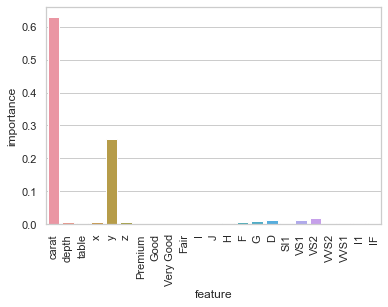

In [714]:
feature_importance_dict = {'importance': RFC.feature_importances_, 'feature': xtrain_scaled.columns}
importance = pd.DataFrame(data=feature_importance_dict)#.sort_values('importance', ascending=False)
sns.barplot(data= importance, x = 'feature', y = 'importance' )
plt.xticks(rotation=90)
plt.show

* *The feature importance plot indicates the relative relevance of all the feature used in the model.* 

* *Its clearly seen form the feature importance plot that 'carat' and width'y' plays an important role in deciding the price of a diamond.* 

* *Now that we have the list of important features, next step in the analysis is to fine tune the model:* 

* *Rebuilding the model with just two features 'carat' and width 'y', the model perfomed slightly better but the scoring got a bit worst, so I rebuilt the model by adding more features: carat, y, F,G,D,VS1,VS2. Below is the explaination of what each feature means for a diamond:* 

1.carat is definately important in deciding the diamond prices as it is directly proportional to the size and weight of the       diamond, also from the feature importance plot carate has a relative importance of ~60%

2.width 'y' is the width of the diamond, it is the widest point of the diamond in millimeters.

3.F,G,D are the colors of diamond:

color D of a Diamonds falls under colorless range and are the most rare and valuable of all those on the color scale.  whereas F colored diamonds will display a nearly undetected amount of color when viewed face down by a experienced professional.
G colored Diamonds are the near colorless range appear colorless in the face up position, but do display a slight amount of color when viewed face down against a perfectly white background.

4.VS1: VS1 is a high clarity grade of diamond with no eye visible inclusions and only small, hard to identify inclusions under 10x magnification can be pin pointed.

VS2: VS2 clarity means that the diamond has small inclusions which are not visible to the naked eye, but that could be seen under 10x magnification by a trained professional. These inclusions are considered very minor and shouldn't affect the diamond's visual appearance

In [718]:
# building a new dataframe whith important features selected

cols = [0,4,13,14,15,17,18] # col index 
#cols = ['carat','y','F','G','D','VS1','VS2'] # respective col names
xtrain_imp = xtrain_scaled[xtrain_scaled.columns[cols]] 
xtest_imp = xtest_scaled[xtest_scaled.columns[cols]]

In [719]:
# model building and fitting with new dataframe which contains important features
%%time
RFC_imp = RandomForestRegressor(n_jobs= -1, random_state=42).fit(xtrain_imp,ytrain)

Wall time: 526 ms


In [720]:
# r2 value of trian and test datasets
print('Training_Score_SVR:', round(RFC_imp.score(xtrain_imp, ytrain),2)*100, '%',
      '\nTesting_Score_SVR:', round(RFC_imp.score(xtest_imp, ytest),2)*100, '%' )

Training_Score_SVR: 97.0 % 
Testing_Score_SVR: 94.0 %


In [721]:
# predicting price for the test data
ypred_test_imp = RFC_imp.predict(xtest_imp)

(array([-2500.,     0.,  2500.,  5000.,  7500., 10000., 12500., 15000.,
        17500., 20000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

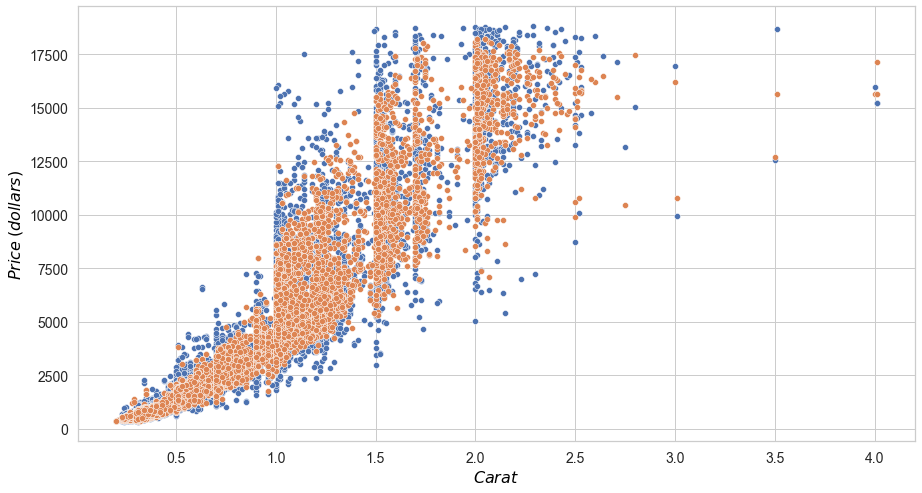

In [770]:
# plot of carat versus price 

sns.set_theme(context='notebook',
    style="whitegrid",
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None)

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
fig_dims = (15,8 )
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x  = Xtest.carat, y = ytest, ax = ax) 
sns.scatterplot(x  = Xtest.carat, y = ypred_test_imp, ax = ax) 

plt.ylabel('Price')
plt.xlabel('Carat')
plt.xlabel(r'$Carat$ ', fontdict = font)
plt.ylabel(r'$Price_ (dollars)$ ', fontdict = font)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


**this above scatter plot is for visual reference which represent how well the predicted data maps the actual data**

In [771]:
# cross validaton
cross_validation_RFC = cross_val_score(estimator=RFC_imp, # the model to evaluate
                                     X=xtrain_imp,
                                     y=ytrain,
                                     scoring='r2', # evaluation metrics
                                     cv= 10, # cross validation splitting
                                     verbose=3) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.937) total time=   2.8s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV] END ................................ score: (test=0.942) total time=   0.8s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


[CV] END ................................ score: (test=0.933) total time=   0.8s
[CV] END ................................ score: (test=0.925) total time=   0.8s
[CV] END ................................ score: (test=0.931) total time=   0.8s
[CV] END ................................ score: (test=0.938) total time=   0.7s
[CV] END ................................ score: (test=0.940) total time=   0.8s
[CV] END ................................ score: (test=0.940) total time=   0.8s
[CV] END ................................ score: (test=0.933) total time=   0.7s
[CV] END ................................ score: (test=0.942) total time=   0.7s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   10.6s finished


**Cross-validation is a technique used in applied machine learning to evaluate a machine learning model's competence on unknown data. That is, to use a small sample to assess how the model will perform in general when used to generate predictions on data that was not utilized during the model's training.**

In [729]:
print(f'Validation accuracy scores: {np.round(cross_validation_RFC,2)}')
print(f'\nmean: {cross_validation_RFC.mean():.2}')
print(f'std: {cross_validation_RFC.std():.1}')

Validation accuracy scores: [0.94 0.94 0.93 0.92 0.93 0.94 0.94 0.94 0.93 0.94]

mean: 0.94
std: 0.005


## Conclusion

**The diamond.csv dataset contains roughly 54K samples with ten variables. Overall, the dataset is not messy and comes with no missing values**

**The model uses following feature to predict the price of the diamond:**

* *the features are divided into 4 class:*

1. Weigth: carat

2. dimension : width 'y'

3. color : F, G, D

4. purity: VS1 and VS2

**with the above features the model predict with an r2 value of 94% and that indicates 94% of the price predicted agress with the actual price.**


**Next steps:**

1. fine tuning of the model is required by a grid search method which will search for most precise and optimal parameters so that MSE can be reduce further**

2. Check for multicollinearity has to be performed**

3. different feature methods can be performed to check feature importance**




